In [1]:
import numpy as np
import matplotlib.pyplot as plt
from simulation import *
from idea import dynamic_IDEA

EXPERIMENT_ID = 9
TRIAL_ID = 0

Ramię ma do pokonoania wiele przeszkód poruszających się w różnych kierunkach, cel znajduje się w dużej odległości.

In [4]:
%%time
random_state(f"rng_states/experiment{EXPERIMENT_ID}.npy")

S = [0.7] * 150
d = len(S)
x_min = -np.pi
x_max = np.pi
T = 6

rectangles = [
    ((-500, 5), (-5, 8)), ((-4, 5), (500, 8)),
    ((-500, 11), (5, 12)), ((6, 11), (500, 12)),
    ((-500, 13), (3, 14)), ((4, 13), (500, 14)),
    ((-500, 16), (-6, 18)), ((-5, 16), (500, 18)),
    ((-500, 22), (8, 25)), ((9, 22), (500, 25)),
]
rectangle_vs = [(0.5, 0)] * 2 + [(-0.2, 0)] * 2 + [(0.4, 0.1)] * 2 + [(0.6, 0.2)] * 2 + [(-0.5, -0.1)] * 2
rectangle_lists = rectangles_with_velocity(rectangles, rectangle_vs, T)

targets = [(0, 30)] * T
objective = dynamic_inverse_kinematics_objectives(S, targets, rectangle_lists)
n_constraints = len(rectangle_lists[0])

n = 1200
alpha_inf = 0.9
n_immigrants = 100
eta_c = 5.
eta_m = 30.
p_c = 0.9
p_m = np.geomspace(0.005, 0.1, d)
num_iterations_init = 3000
num_iterations = 1000

population_hist, score_hist = dynamic_IDEA(objective, n_constraints, T, x_min, x_max, d, n, alpha_inf, eta_c, eta_m, p_c, p_m,
                           num_iterations=num_iterations, num_iterations_init=num_iterations_init, n_immigrants=n_immigrants, log_interval=50)
TRIAL_ID = 1
np.savez(f"/tmp/histories/experiment{EXPERIMENT_ID}_{TRIAL_ID}", populations=population_hist, scores=score_hist)

t=0
Iteration 0, #feasible: 249, best: [629.49857169], #infeasible: 951, best: [137.36677298   1.        ]
Iteration 50, #feasible: 120, best: [563.71586411], #infeasible: 1080, best: [0.89953777 1.        ]
Iteration 100, #feasible: 120, best: [445.2589228], #infeasible: 1080, best: [0.89953777 1.        ]
Iteration 150, #feasible: 120, best: [445.2589228], #infeasible: 1080, best: [0.01385936 1.        ]
Iteration 200, #feasible: 120, best: [445.2589228], #infeasible: 1080, best: [0.00149805 1.        ]
Iteration 250, #feasible: 120, best: [389.06930551], #infeasible: 1080, best: [0.00149805 1.        ]
Iteration 300, #feasible: 120, best: [314.40574004], #infeasible: 1080, best: [3.88455949e-04 1.00000000e+00]
Iteration 350, #feasible: 120, best: [311.16678121], #infeasible: 1080, best: [7.97220212e-05 1.00000000e+00]
Iteration 400, #feasible: 120, best: [300.02413123], #infeasible: 1080, best: [7.97220212e-05 1.00000000e+00]
Iteration 450, #feasible: 120, best: [300.02413123], #inf

OverflowError: cannot serialize a bytes object larger than 4 GiB

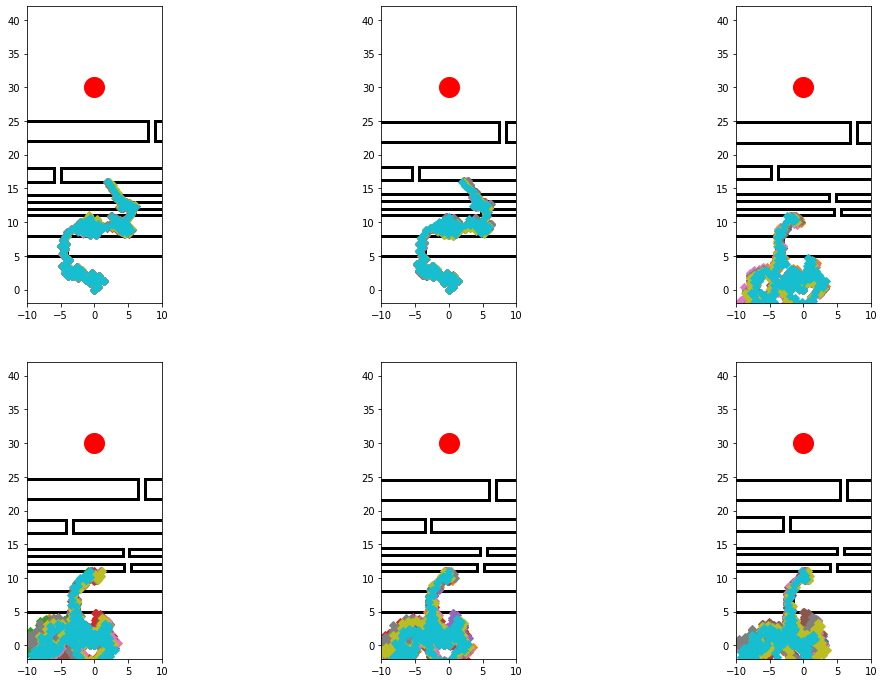

In [7]:
feasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    feasible_population = populations[-1][mask, :]
    best = np.argsort(scores[-1, mask, 0])[:10]
    feasible_populations.append(feasible_population[best])
    
draw_dynamic_solutions(feasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=3, figsize=(18, 12), xlim=(-10, 10), ylim=(-2, 42), squeeze=False)

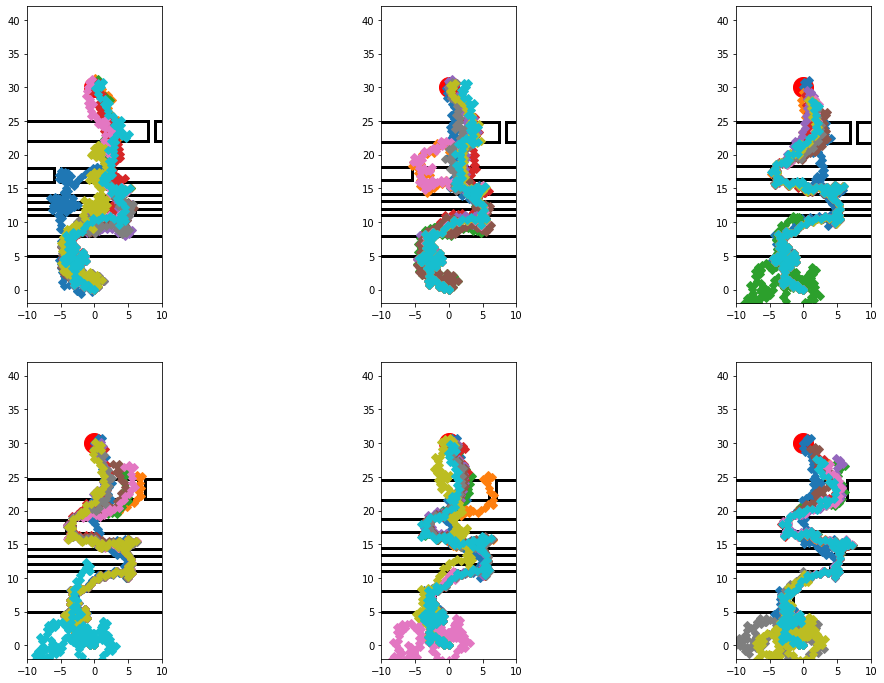

In [8]:
infeasible_populations = []
for populations, scores in zip(population_hist, score_hist):
    mask = scores[-1][:, 1] == 0.
    infeasible_population = populations[-1][~mask, :]
    infeasible_populations.append(infeasible_population[::sum(~mask) // 10])
    
draw_dynamic_solutions(infeasible_populations, S, targets, rectangle_lists, np.arange(T), 
                       nrows=2, ncols=3, figsize=(18, 12), xlim=(-10, 10), ylim=(-2, 42), squeeze=False)